In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
import os
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


%matplotlib inline

In [2]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn.grid_search import GridSearchCV

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/veenakumar/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [76]:
df = pd.read_csv('/Users/veenakumar/Desktop/Projects/Luther/Luther_AlteredAgain.csv')
df = df.drop('Unnamed: 0',axis=1)


In [77]:
df.columns

Index([u'Runtime', u'Domestic_Total', u'Production_Budget', u'Foreign',
       u'Total_Gross', u'Domestic_Percent', u'Foreign_Percent',
       u'Genre_Adventure', u'Genre_SciFi', u'Genre_Comedy', u'Genre_Drama',
       u'Genre_Romance', u'Genre_Horror', u'Genre_Documentary',
       u'Genre_Animation', u'Genre_Musical', u'G', u'PG', u'PG13', u'R',
       u'Season_Fall', u'Season_Spring', u'Season_Summer', u'Season_Winter',
       u'Release_Yr_2000', u'Release_Yr_2001', u'Release_Yr_2002',
       u'Release_Yr_2003', u'Release_Yr_2004', u'Release_Yr_2005',
       u'Release_Yr_2006', u'Release_Yr_2007', u'Release_Yr_2008',
       u'Release_Yr_2009', u'Release_Yr_2010', u'Release_Yr_2011',
       u'Release_Yr_2012', u'Release_Yr_2013', u'Release_Yr_2014',
       u'Release_Yr_2015', u'Release_Yr_2016', u'Distributor_Disney',
       u'Distributor_Fox', u'Distributor_Lions Gate', u'Distributor_Paramount',
       u'Distributor_Sony', u'Distributor_Universal',
       u'Distributor_Warner Bros'],

In [78]:
df = df[['Foreign','Foreign_Percent','Runtime','Total_Gross','Genre_Adventure','Genre_Comedy','Genre_Drama','Genre_Romance','Genre_Animation','Season_Fall','Season_Winter','Season_Summer','Season_Spring','Release_Yr_2000','Release_Yr_2001','Release_Yr_2001','Release_Yr_2002','Release_Yr_2003','Release_Yr_2004','Release_Yr_2005','Release_Yr_2006','Release_Yr_2007','Release_Yr_2008','Release_Yr_2009','Release_Yr_2010','Release_Yr_2011','Release_Yr_2012','Release_Yr_2013','Release_Yr_2014','Release_Yr_2015','Release_Yr_2016','Distributor_Fox','Distributor_Lions Gate','Distributor_Paramount','Distributor_Sony','Distributor_Universal','Distributor_Warner Bros','G','PG','PG13','R']]

In [79]:
df['Foreign'].describe()

count    1.367000e+03
mean     1.385433e+08
std      1.853997e+08
min      0.000000e+00
25%      3.071409e+07
50%      6.868997e+07
75%      1.698946e+08
max      2.341038e+09
Name: Foreign, dtype: float64

In [71]:
#Making the variables in the correct format to include into the patsy model.
Xs = [c for c in df.columns]
'\") + Q(\"'.join(Xs)

'Foreign_Percent") + Q("Runtime") + Q("Total_Gross") + Q("Genre_Adventure") + Q("Genre_Comedy") + Q("Genre_Drama") + Q("Genre_Romance") + Q("Genre_Animation") + Q("Season_Fall") + Q("Season_Winter") + Q("Season_Summer") + Q("Season_Spring") + Q("Release_Yr_2000") + Q("Release_Yr_2001") + Q("Release_Yr_2001") + Q("Release_Yr_2002") + Q("Release_Yr_2003") + Q("Release_Yr_2004") + Q("Release_Yr_2005") + Q("Release_Yr_2006") + Q("Release_Yr_2007") + Q("Release_Yr_2008") + Q("Release_Yr_2009") + Q("Release_Yr_2010") + Q("Release_Yr_2011") + Q("Release_Yr_2012") + Q("Release_Yr_2013") + Q("Release_Yr_2014") + Q("Release_Yr_2015") + Q("Release_Yr_2016") + Q("Distributor_Fox") + Q("Distributor_Lions Gate") + Q("Distributor_Paramount") + Q("Distributor_Sony") + Q("Distributor_Universal") + Q("Distributor_Warner Bros") + Q("G") + Q("PG") + Q("PG13") + Q("R'

In [80]:
y = df['Foreign']
y, X = patsy.dmatrices('y ~ Q("Runtime") + Q("Total_Gross") + Q("Genre_Adventure") + Q("Genre_Comedy") + Q("Genre_Drama") + Q("Genre_Romance") + Q("Genre_Animation") + Q("Season_Fall") + Q("Season_Winter") + Q("Season_Summer") + Q("Season_Spring") + Q("Release_Yr_2000") + Q("Release_Yr_2001") + Q("Release_Yr_2001") + Q("Release_Yr_2002") + Q("Release_Yr_2003") + Q("Release_Yr_2004") + Q("Release_Yr_2005") + Q("Release_Yr_2006") + Q("Release_Yr_2007") + Q("Release_Yr_2008") + Q("Release_Yr_2009") + Q("Release_Yr_2010") + Q("Release_Yr_2011") + Q("Release_Yr_2012") + Q("Release_Yr_2013") + Q("Release_Yr_2014") + Q("Release_Yr_2015") + Q("Release_Yr_2016") + Q("Distributor_Fox") + Q("Distributor_Lions Gate") + Q("Distributor_Paramount") + Q("Distributor_Sony") + Q("Distributor_Universal") + Q("Distributor_Warner Bros") + Q("G") + Q("PG") + Q("PG13") + Q("R")', return_type="dataframe",data=df)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     648.8
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        23:12:50   Log-Likelihood:                -17967.
No. Observations:                 956   AIC:                         3.601e+04
Df Residuals:                     920   BIC:                         3.618e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                    -2.351e+07   5.98e+06     -3.930      0.000     -3.52e+07 -1.18e+07
Q("Runtime")                  1.101e+05   8.09e+04      1.361      0.174     -4.87e+04  2.69e+05
Q("Total_Gross")                 0.6442      0.005    118.343      0.000         0.633     0.655
Q("Genre_Adventure")          1.035e+06   3.01e+06      0.343      0.731     -4.88e+06  6.95e+06
Q("Genre_Comedy")            -1.223e+07   2.93e+06     -4.180      0.000      -1.8e+07 -6.49e+06
Q("Genre_Drama")             -1.122e+07   3.56e+06     -3.153      0.002     -1.82e+07 -4.24e+06
Q("Genre_Romance")            1.303e+07   5.24e+06      2.489      0.013      2.76e+06  2.33e+07
Q("Genre_Animation")          6.958e+06   5.55e+06      1.253      0.211     -3.94e+06  1.79e+07
Q("Season_Fall")             -2.295e+06   2.59e+06     -0.886      0.376     -7.38e+06  2.79e+06
Q("Season_Winter")           -6.877e+06   2.54e+06     -2.705      0.007     -1.19e+07 -1.89e+06
Q("Season_Summer")           -8.848e+06    2.5e+06     -3.535      0.000     -1.38e+07 -3.94e+06
Q("Season_Spring")           -5.488e+06   2.59e+06     -2.119      0.034     -1.06e+07 -4.05e+05
Q("Release_Yr_2000")         -1.883e+07   4.78e+06     -3.940      0.000     -2.82e+07 -9.45e+06
Q("Release_Yr_2001")[0]      -8.917e+06   2.32e+06     -3.844      0.000     -1.35e+07 -4.36e+06
Q("Release_Yr_2001")[1]      -8.917e+06   2.32e+06     -3.844      0.000     -1.35e+07 -4.36e+06
Q("Release_Yr_2002")         -1.609e+07   5.29e+06     -3.039      0.002     -2.65e+07  -5.7e+06
Q("Release_Yr_2003")         -1.269e+07   4.58e+06     -2.769      0.006     -2.17e+07  -3.7e+06
Q("Release_Yr_2004")         -1.034e+07   5.04e+06     -2.054      0.040     -2.02e+07 -4.59e+05
Q("Release_Yr_2005")         -1.228e+07   5.01e+06     -2.454      0.014     -2.21e+07 -2.46e+06
Q("Release_Yr_2006")         -7.096e+06   4.37e+06     -1.623      0.105     -1.57e+07  1.48e+06
Q("Release_Yr_2007")         -7.489e+06   4.72e+06     -1.586      0.113     -1.68e+07  1.78e+06
Q("Release_Yr_2008")         -4.637e+06   4.49e+06     -1.032      0.302     -1.35e+07  4.18e+06
Q("Release_Yr_2009")         -1.116e+07   4.26e+06     -2.617      0.009     -1.95e+07 -2.79e+06
Q("Release_Yr_2010")          1.559e+06   4.71e+06      0.331      0.741     -7.69e+06  1.08e+07
Q("Release_Yr_2011")          5.791e+06   4.63e+06      1.252      0.211     -3.29e+06  1.49e+07
Q("Release_Yr_2012")          1.197e+07   4.48e+06      2.673      0.008      3.18e+06  2.08e+07
Q("Release_Yr_2013")          1.046e+07   4.62e+06      2.266      0.024       1.4e+06  1.95e+07
Q("Release_Yr_2014")          1.026e+07   4.55e+06      2.252      0.025      1.32e+06  1.92e+07
Q("Release_Yr_2015")          9.534e+06   5.02e+06      1.900      0.058    

In [30]:
kfold = KFold(len(X_train), shuffle=True, random_state=0)

In [31]:
lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

# Build the Model
lin_reg_est.fit(X_train, y_train)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
df = df.dropna()

In [61]:
df.to_csv('/Users/veenakumar/Desktop/Projects/Luther/Luther_AlteredAgain2.csv')

In [81]:
df.corr()

,Foreign,Foreign_Percent,Runtime,Total_Gross,Genre_Adventure,Genre_Comedy,Genre_Drama,Genre_Romance,Genre_Animation,Season_Fall,...,Distributor_Fox,Distributor_Lions Gate,Distributor_Paramount,Distributor_Sony,Distributor_Universal,Distributor_Warner Bros,G,PG,PG13,R
Foreign,1.000000,0.501269,0.335528,0.978006,0.216978,-0.253606,-0.166397,-0.064719,0.197590,-0.054853,...,0.048235,-0.091977,-0.018401,-0.072059,-0.032892,0.018655,0.010788,0.094291,0.085834,-0.184033
Foreign_Percent,0.501269,1.000000,0.145026,0.405512,0.196799,-0.298039,-0.163410,-0.006876,0.164556,-0.010950,...,0.090712,-0.093642,-0.053367,-0.032310,-0.012784,0.045162,0.005346,0.031115,0.005567,-0.036168
Runtime,0.335528,0.145026,1.000000,0.335550,0.205321,-0.234104,0.251319,-0.010632,-0.270241,0.009038,...,-0.056082,-0.018945,0.015830,-0.046663,0.029539,0.082169,-0.208777,-0.230125,0.195838,0.081134
Total_Gross,0.978006,0.405512,0.335550,1.000000,0.214590,-0.225797,-0.160549,-0.072004,0.188689,-0.065319,...,0.032861,-0.101893,-0.007255,-0.074720,-0.027412,0.011462,0.019043,0.093249,0.092444,-0.194289
Genre_Adventure,0.216978,0.196799,0.205321,0.214590,1.000000,-0.239679,-0.145376,-0.158644,-0.199514,-0.074294,...,-0.009415,0.005300,0.002395,0.003594,-0.026998,0.023927,-0.135322,-0.106467,0.169626,-0.032754
Genre_Comedy,-0.253606,-0.298039,-0.234104,-0.225797,-0.239679,1.000000,-0.140672,0.226354,-0.222475,-0.091908,...,0.046416,-0.016859,-0.073494,0.068149,0.069387,-0.028626,-0.075414,-0.024309,0.036495,0.015531
Genre_Drama,-0.166397,-0.163410,0.251319,-0.160549,-0.145376,-0.140672,1.000000,-0.116824,-0.141059,0.098597,...,-0.003019,0.031100,0.004047,0.012143,-0.028403,0.037243,-0.076531,-0.122744,0.086418,0.047344
Genre_Romance,-0.064719,-0.006876,-0.010632,-0.072004,-0.158644,0.226354,-0.116824,1.000000,-0.084087,-0.046640,...,-0.041608,0.024635,-0.049186,0.025203,0.015446,0.060989,-0.057033,-0.092262,0.106985,-0.011518
Genre_Animation,0.197590,0.164556,-0.270241,0.188689,-0.199514,-0.222475,-0.141059,-0.084087,1.000000,0.076586,...,0.013830,-0.059312,0.070869,-0.068280,-0.082799,-0.083542,0.372060,0.392746,-0.292684,-0.192067
Season_Fall,-0.054853,-0.010950,0.009038,-0.065319,-0.074294,-0.091908,0.098597,-0.046640,0.076586,1.000000,...,-0.020496,0.040128,-0.032984,0.044873,-0.038306,-0.005709,0.007173,0.023275,-0.076486,0.061439


ValueError: x and y must be the same size

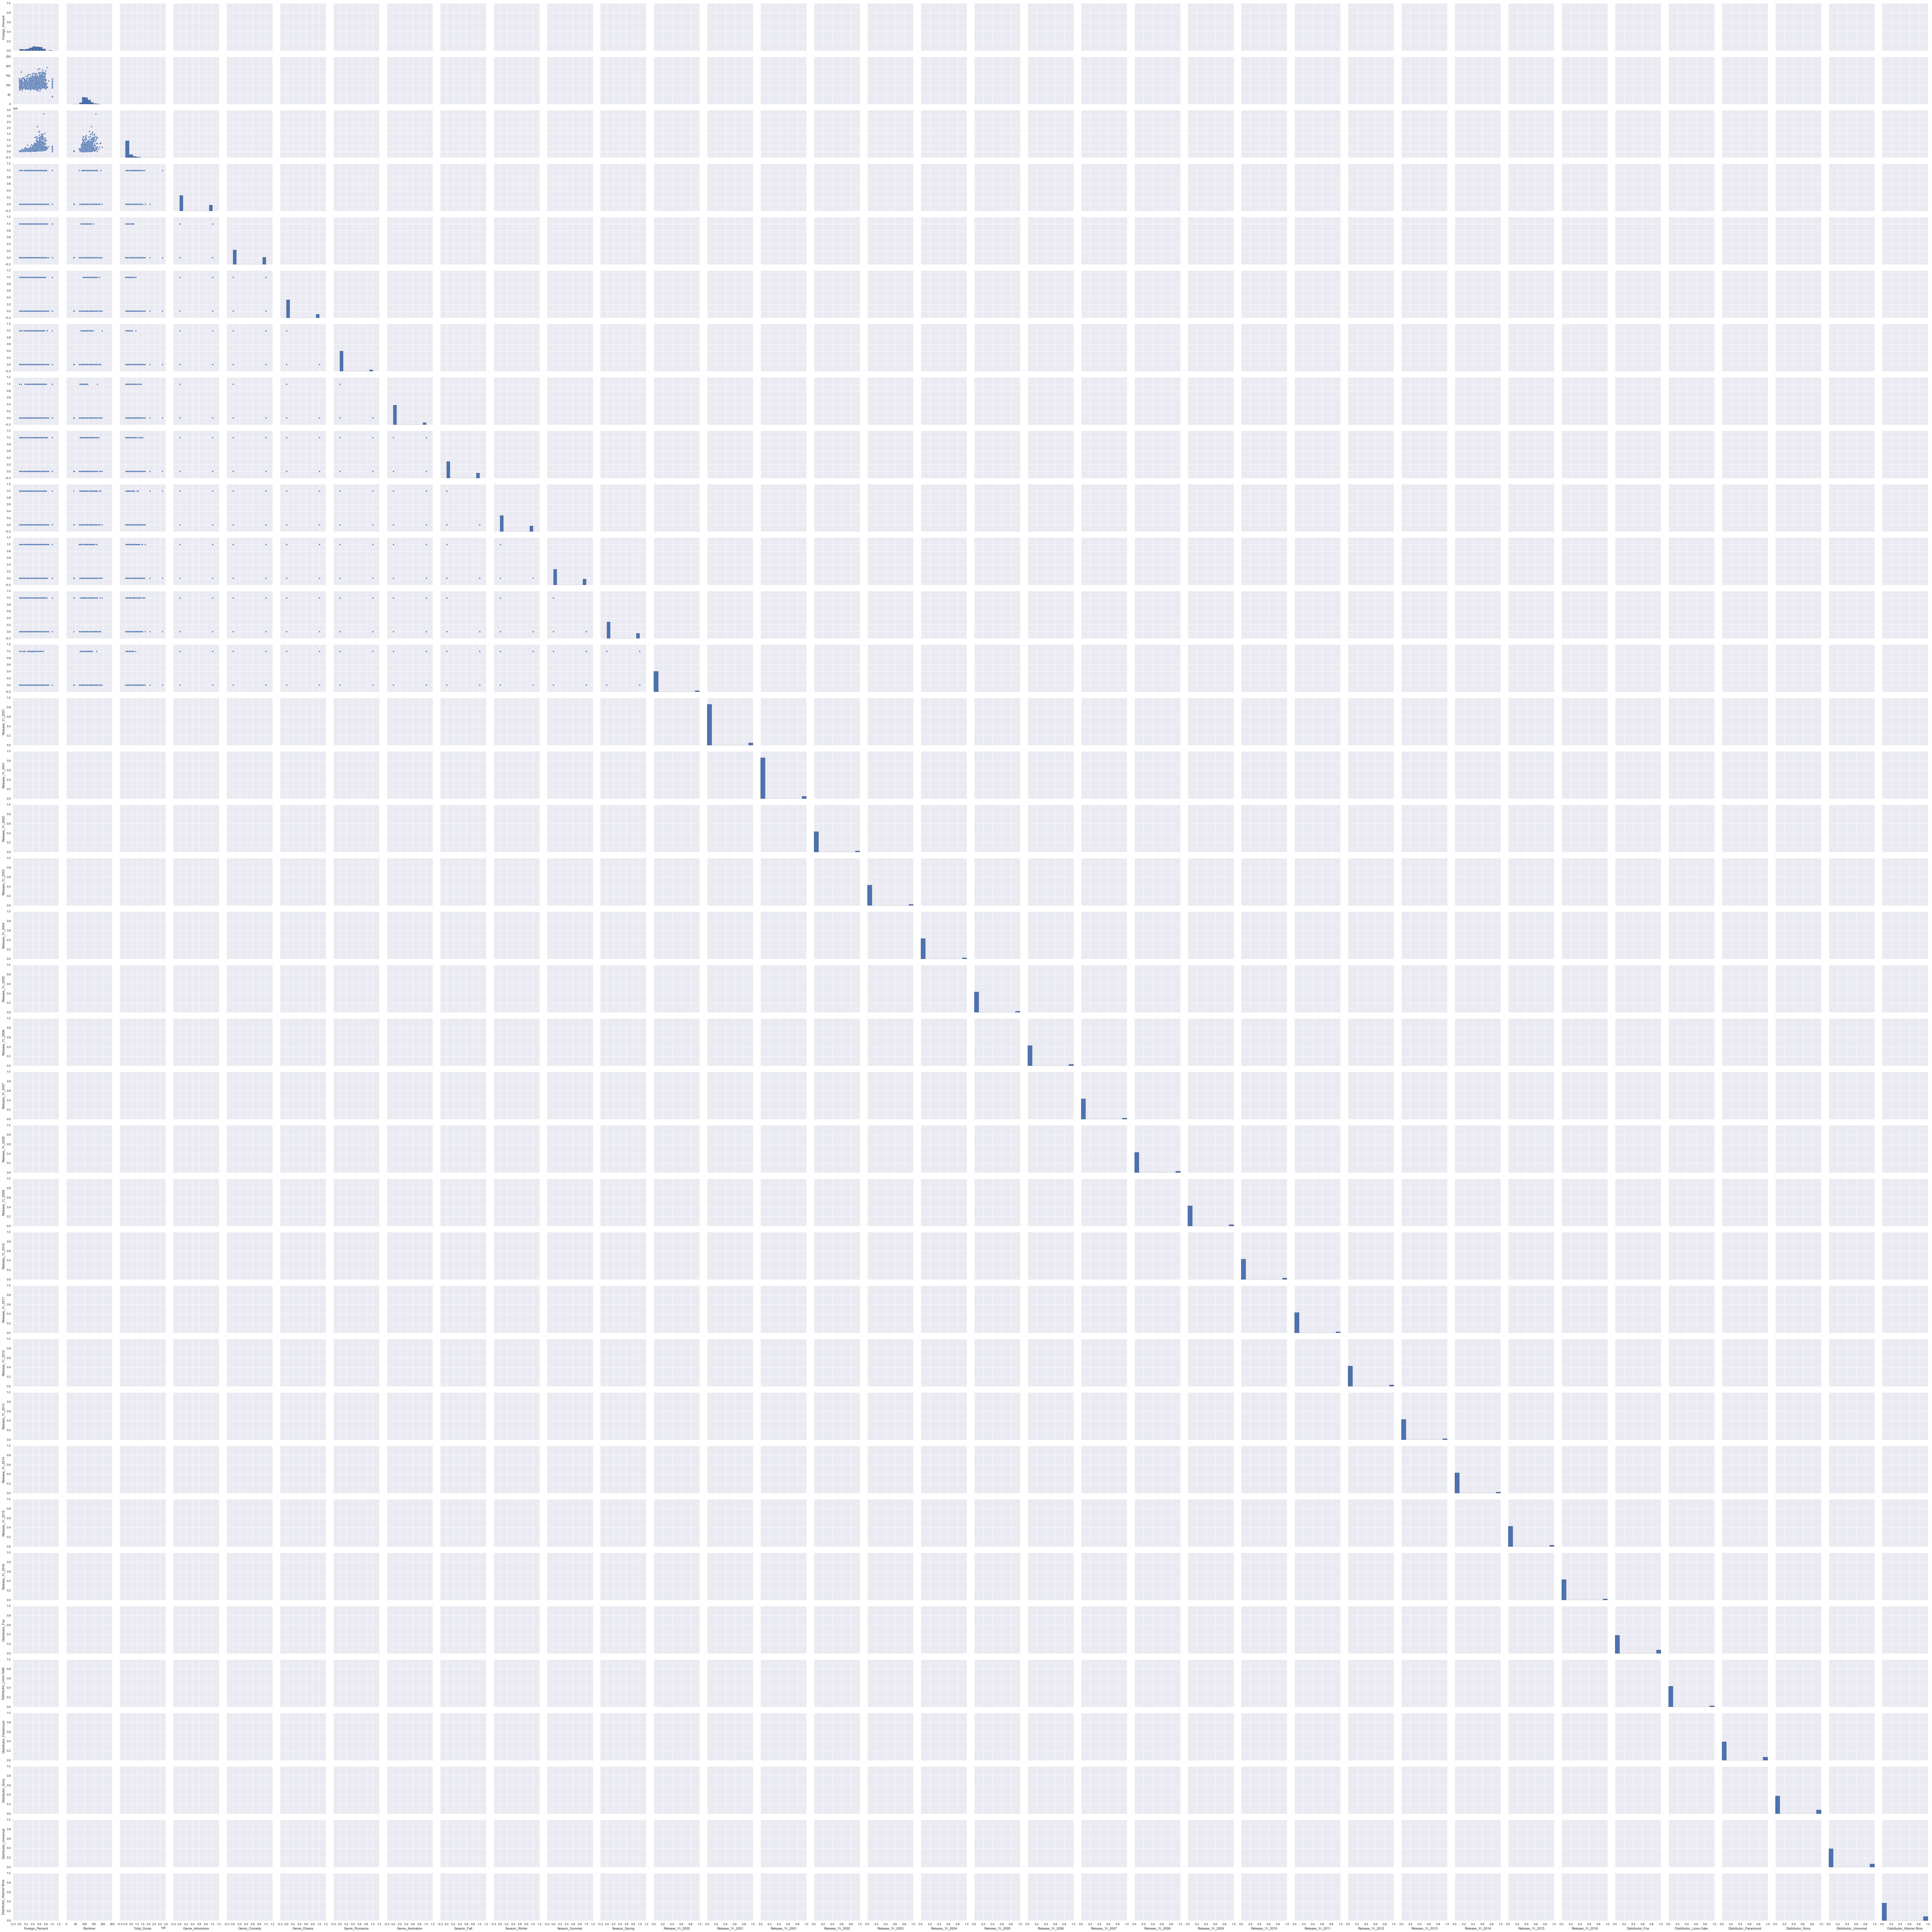

In [64]:
sns.pairplot(df)